In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
%pylab inline 
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Split dataset into training and testing

In [6]:
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


df = pd.DataFrame(data=np.c_[X_train, y_train],
                        columns=iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,4.6,3.6,1.0,0.2,0.0
1,5.7,4.4,1.5,0.4,0.0
2,6.7,3.1,4.4,1.4,1.0
3,4.8,3.4,1.6,0.2,0.0
4,4.4,3.2,1.3,0.2,0.0


#### Basic visualization of dataset

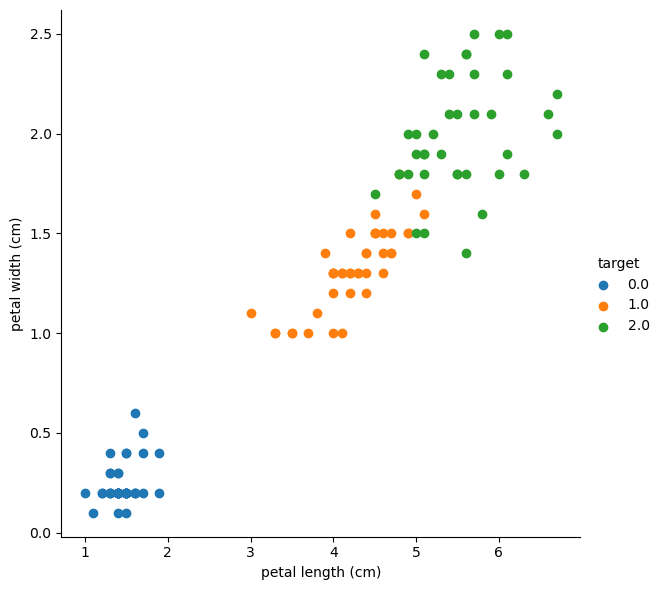

In [7]:
sns.FacetGrid(df, hue="target", height=6).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()

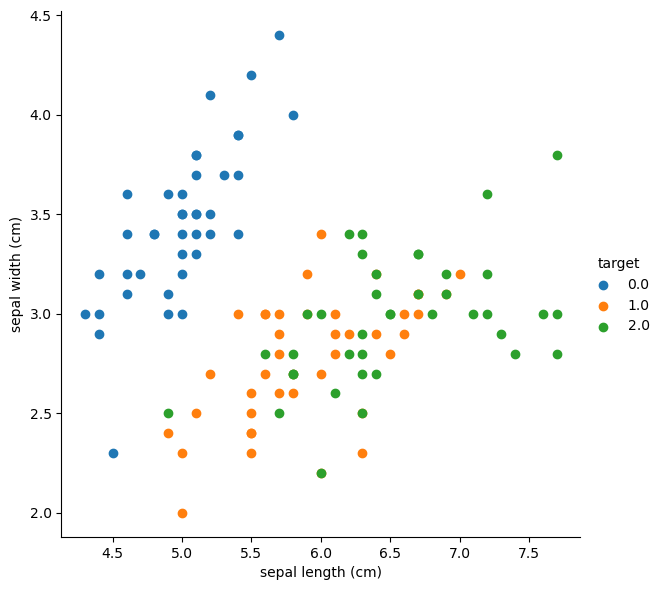

In [20]:
sns.FacetGrid(df, hue="target", height=6).map(plt.scatter, "sepal length (cm)", "sepal width (cm)").add_legend()

## Calculating accuracy

In [45]:
from sklearn.ensemble import RandomForestClassifier
import math

forest = RandomForestClassifier(criterion='gini',n_estimators=1, max_depth=10)

forest.fit(X_train, y_train)

print("Accuracy of classification of iris dataset using random forest for training dataset: " + str(forest.score(X_train, y_train) * 100) + "%")

Accuracy of classification of iris dataset using random forest for training dataset: 95.83333333333334%


In [48]:
forest.fit(X_test, y_test)

print("Accuracy of classification of iris dataset using random forest for testing dataset: " + str(forest.score(X_test, y_test) * 100
) + "%")

Accuracy of classification of iris dataset using random forest for testing dataset: 93.33333333333333%


## Hyperturning parameters

In [87]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at a leaf node
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

# Initialize the model
forest = RandomForestClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation score:  0.9666666666666666


#### Limiting hypermeter into a smaller range

In [148]:
param_grid = {
    'n_estimators': [10, 20, 30, 50, 100], 
    'max_depth': [15, 20, 25], 
    'min_samples_split': [2, 3, 4, 5], 
    'min_samples_leaf': [1, 2, 3, 4],    
    'criterion': ['gini', 'entropy']  
}

forest = RandomForestClassifier()

grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 20}
Best cross-validation score:  0.9666666666666666


## Calculating accuracy using best parameters found

Hyperparamters set 1

In [107]:
forest2 = RandomForestClassifier(criterion='gini', max_depth = 10, min_samples_leaf = 4, min_samples_split = 5, n_estimators = 50)

forest2.fit(X_train, y_train)

print("Accuracy of classification of iris dataset using random forest for training dataset: " + str(forest2.score(X_train, y_train) * 100) + "%")

Accuracy of classification of iris dataset using random forest for training dataset: 96.66666666666667%


In [83]:
forest2.fit(X_test, y_test)

print("Accuracy of classification of iris dataset using random forest for testing dataset: " + str(forest2.score(X_test, y_test) * 100
) + "%")

Accuracy of classification of iris dataset using random forest for testing dataset: 100.0%


Hyperparameters set 2

In [149]:
forest3 = RandomForestClassifier(criterion='gini', max_depth = 20, min_samples_leaf = 3, min_samples_split = 2, n_estimators = 20)

forest3.fit(X_train, y_train)

print("Accuracy of classification of iris dataset using random forest for training dataset: " + str(forest3.score(X_train, y_train) * 100) + "%")

Accuracy of classification of iris dataset using random forest for training dataset: 97.5%


In [155]:
forest3.fit(X_test, y_test)

print("Accuracy of classification of iris dataset using random forest for testing dataset: " + str(forest3.score(X_test, y_test) * 100
) + "%")

Accuracy of classification of iris dataset using random forest for testing dataset: 100.0%


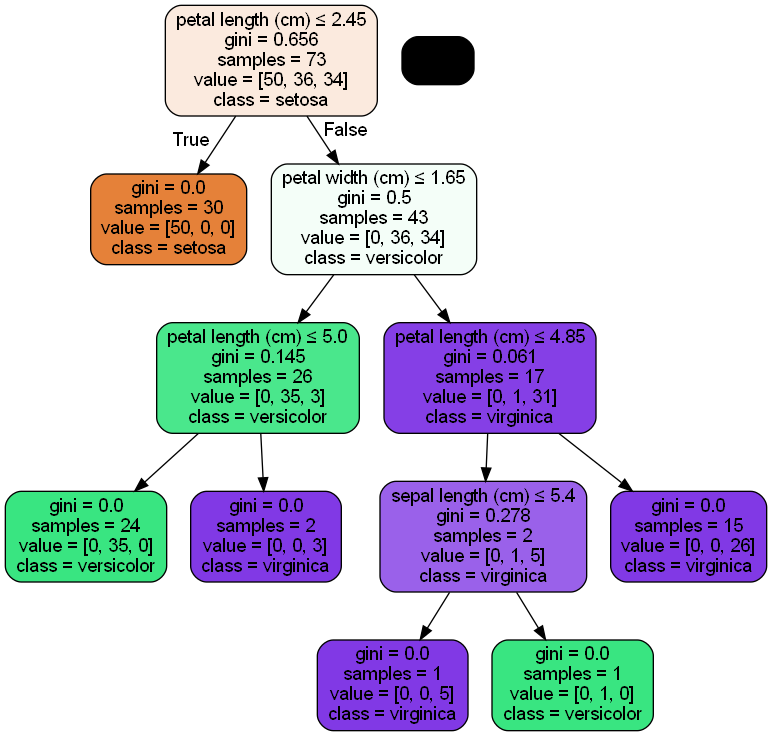

In [14]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from six import StringIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

tree = forest3.estimators_[1]


dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, 
                feature_names=iris.feature_names,  
                class_names=iris.target_names,
                filled=True, rounded=True,
                special_characters=True,
                )

# Create the graph using pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Display the graph
Image(graph.create_png())



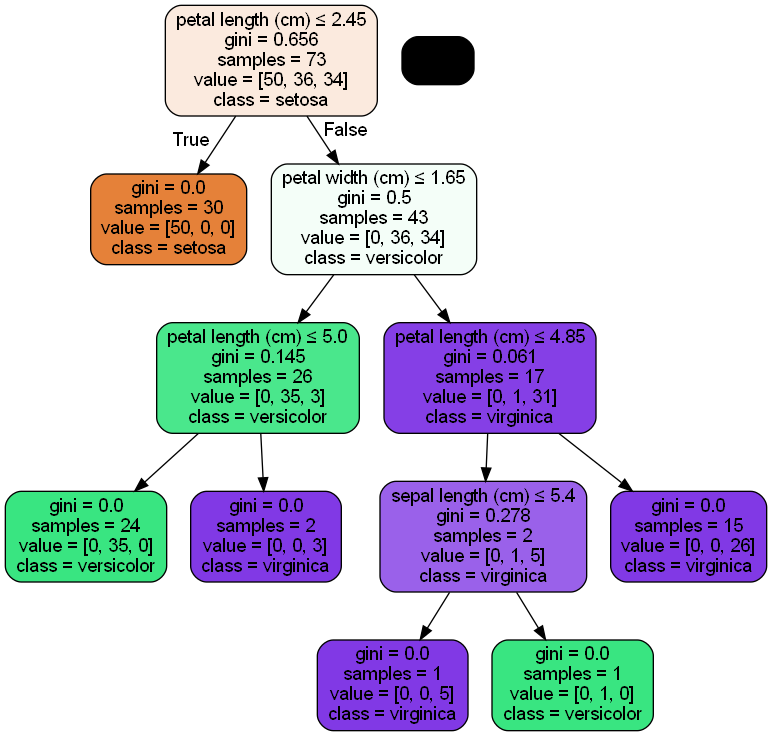

In [15]:
# Extract the single tree from the Random Forest
tree = forest3.estimators_[1]

# Visualize the tree
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, 
                feature_names=iris.feature_names,  
                class_names=iris.target_names,
                filled=True, rounded=True,
                special_characters=True)

# Create the graph using pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Display the graph
Image(graph.create_png())

In [52]:

expected = y_train
predicted = forest3.predict(X_train)

predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
